## Redeption Decay Functions for Reconciliation Estimation

In [1]:
# This program uses MiniConda Python 3.6
%matplotlib inline

!pip install numdifftools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numdifftools as nd
from scipy.optimize import curve_fit as cf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 2.0 MB/s 
     |████████████████████████████████| 189 kB 21.3 MB/s 
  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=59f1b27abc0ad29f3ee008d3d6246e621c94085b516719040c075f8f58925e92
  Stored in directory: /root/.cache/pip/wheels/a8/fd/06/21dc6aba9f680fdbde386c06b1a8a1cf3d9a5f6bd96e31dcd4
Successfully built algopy


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# this function defines the shape of decay and allows the curve fitting function
# to model a best fit approximation

def func(x, a, b):
    return a * np.exp(-b * (x))

# this function uses curve fit to arrive at popt, the optimal values minimizing
# the sum of squares
# p0 is provided as an input as an initial guess for the algorithm
def output(x, y, p0):
    popt, pcov = cf(func, x, y, p0)
    # perr = np.sqrt(np.diag(pcov))
    a = np.round(popt[0], 5)
    b = np.round(popt[1], 5)
    r_squared(x, y, a, b)
    plot_curve(x, y, a, b)
    return a, b


In [4]:

def r_squared(x, y, a, b):
    res = y - func(x, a, b)
    ss_r = np.sum(res ** 2)
    ss_tot = np.sum((y - np.mean(y) ** 2))
    r_sq = np.round((1 - (ss_r / ss_tot)), 4)
    print(f'R^2 = {r_sq}')
    print(f'Curve Formula: y={a}*exp^(-{b}*(x)')


def plot_curve(x, y, a, b):
    x_est = np.arange(min(x), max(x))
    y_est = func(x_est, a, b)
    plt.figure(figsize=(8,8))
    plt.scatter(x, y, s=12)
    plt.plot(x_est, y_est, '--', color='red')
    plt.show()


In [5]:
# Load Bayer Curves
# Data has media type to break into appropriate groups and run curves
# the following code separates the coupon types into groups and plots a
# best fit curve for each with appropriate r-squared
all_coupons = pd.read_csv('/content/drive/MyDrive/IN/Bayer/Bayer_Q4_Final/Bayer_Q4_2.csv')
p0 = [1.0, .05]

Sunday FSI R^2 & Fit Chart
R^2 = 0.9206
Curve Formula: y=0.08781*exp^(-0.00134*(x)


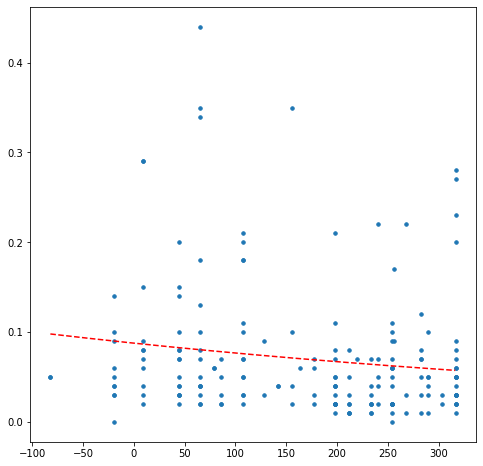

In [6]:
#Sunday FSI Curve
sun_fsi = all_coupons[all_coupons["Media_Type"] == "Sunday Fsi"]
np_sun_fsi = sun_fsi[['Time_Since_Issue', 'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_sun_fsi[:, 0]
y = np_sun_fsi[:, 1]

print('Sunday FSI R^2 & Fit Chart')
a, b = output(x, y, p0)

Paperless R^2 & Fit Chart
R^2 = 0.4175
Curve Formula: y=1.02963*exp^(-0.00124*(x)


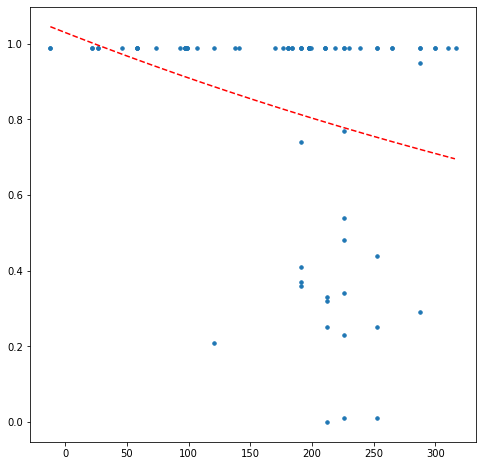

In [7]:
#@title
# Paperless Curve
paperless = all_coupons[all_coupons["Media_Type"] == "Paperless"]
np_paperless = paperless[['Time_Since_Issue',
                          'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paperless[:, 0]
y = np_paperless[:, 1]

print('Paperless R^2 & Fit Chart')
a, b = output(x, y, p0)

Paperless + Print Group R^2 & Fit Chart
R^2 = 0.2947
Curve Formula: y=0.80895*exp^(--0.00024*(x)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


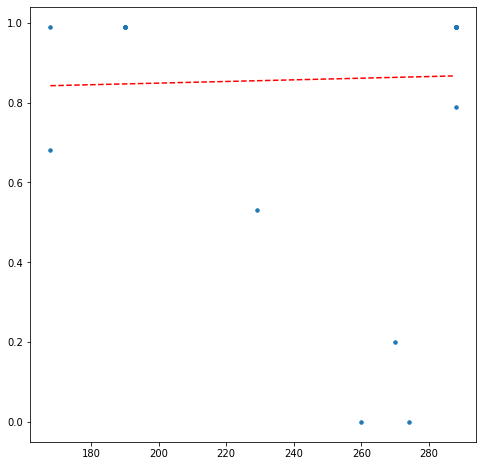

In [8]:
#@title
# Paperless + Print At Home, Print at Home, Paperless + Print at Home Curve

paper_print = all_coupons[all_coupons["Media_Type"].isin(["Paperless + Print at Home",
                                                          "Print At Home", 
                                                          "Paperless + Print at Home + Handout"])]

np_paper_print = paper_print[['Time_Since_Issue', 'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_paper_print[:, 0]
y = np_paper_print[:, 1]

print('Paperless + Print Group R^2 & Fit Chart')
a, b = output(x, y, p0)

Handout Group R^2 & Fit Chart
R^2 = 0.3151
Curve Formula: y=0.95091*exp^(-0.00055*(x)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


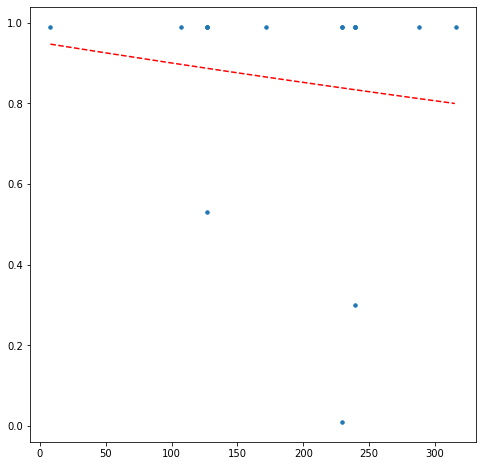

In [9]:
#@title
# HANDOUT, HANDOUT IN-STORE, HANDOUT IN-STORE DISPLAY, HANDOUT IN-STORE TEARPAD,
# HANDOUT SHELF DISPENSER, HANDOUT WITH SAMPLE, INSTANT ON-PACK,
# INSTANT ON-PACK FACTORY APPLIED, ON-PACK

handout = all_coupons[all_coupons["Media_Type"].
                      isin(["Handout", "Handout In-Store", 
                            "Handout In-Store Display", 
                            "Handout In-Store Tearpad", 
                            "Handout Shelf Dispenser", 
                            "Handout With Samole", "Instant On-Pack",
                            "On-Pack"])]

np_handout = handout[['Time_Since_Issue',
                      'Total_Dist_Percent']].to_numpy(dtype=float)

x = np_handout[:, 0]
y = np_handout[:, 1]

print('Handout Group R^2 & Fit Chart')
a, b = output(x, y, p0)